In [1]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Spark Architecture

The local mode and local cluster mode, although the easiest and quickest methods of setting up Spark, are used mainly for **testing purposes**.

Spark applications run as independent sets of processes on a **cluster**, coordinated by the SparkContext (the _driver program_). 

To run on a cluster: 
+ SparkContext (driver) can connect to several types of **cluster managers**, which _allocate_ resources across applications. 
+ Once connected, Spark acquires **executors** on nodes in the cluster, which are processes that run computations and store data for your application. 
+ Next, it sends your application code (Python files) to the executors.
+ Finally, the driver (SparkContext) sends tasks for the executors to run. 


## Spark Cluster

   + Definiton: A set of interconnected processes, running in a distributed manner on different machines.
   + Types (3): 
        1. **Spark Standalone**: A simple cluster manager included with Spark that makes it easy to set up a cluster
        2. **Hadoop YARN**: The resource manager in Hadoop 2
        3. **Apache Mesos**: The general cluster mgr that can also run Hadoop MapReduce and service applications.  

## Glossary

- **Application**: User program built on Spark, consists of _driver program_ and _executors_ on the cluster. 

- **Driver Program**: The process running the main() function of the application and creating the SparkContext

- **Cluster Manager**: An external service for acquiring resources on the cluster (e.g. Standalone Mgr, Mesos, YARN)


- **Deploy Mode**: Distinguishes _where_ the driver process runs. 
    + In "cluster" mode, the framework launches the driver **inside** of the cluster. 
    + In "client" mode, the submitter launches the driver **outside** of the cluster.
    
    
- **Worker Node**: Any node that can run application code in the cluster

- **Executor**: A process launched for an application on a worker node, that runs tasks and keeps data in memory or disk storage across them. Each application has its own executors.

- **Task**: A unit of work that will be sent to one executor

- **Job**: A parallel computation consisting of multiple tasks that gets spawned in response to a Spark action (e.g. save, collect); you'll see this term used in the driver's logs.

- **Stage**: Each job gets divided into smaller sets of tasks called stages that depend on each other (similar to the map and reduce stages in MapReduce); you'll see this term used in the driver's logs.

## Spark Runtime Components
```
Client --> Driver <---> Executors
```
1. **Client**: Start driver & configuration
    + Starts the driver program.
    + Prepares the classpath and all configuration options.
    + Client process : spark-submit, pyspark, spark-shell scripts
2. **Driver**
    + Orchestrates and monitors executor of an Spark application.
    + Send task to executors
        + Once it gets information from the Spark master of all the workers in the cluster and where they are, the driver program **distributes** Spark tasks to each worker’s executor.
    + Also receive computed results from each executor’s tasks.
    + Always one driver per application
3. **Executor**
    + Executes Spark tasks with a configurable number of cores.
    + Stores and caches all data partitions in its memory.   

## Deploy Mode

- Whether Spark job is submitted to locally or on cluster for execution, there is one more parameter that define behavior of Spark job. This parameter is **where** is the "driver" (the process which running main() of application) component of Spark job will reside.


- Deploy mode specifies the location of where driver executes in the deployment environment.


- You can control the deploy mode of a Spark application using `spark-submit`’s `--deploy-mode` command-line option or `spark.submit.deployMode` Spark property.


- There are two options: 

    1. **Client-deploy mode**: The driver runs on the machine that the Spark application was launched

    2. **Cluster-deploy mode**: The driver runs on a random node in a cluster.

### Client Mode

- When this mode is set to **`client mode`**, the `driver` component of Spark job will run on the machine from which the job is submitted. 


- This mode is great when you want to use spark interactively like give some user input or use any shell command.


- This mode works fine when job submitting machine is within or **near** to "Spark Infrastructure" as it will not have much network latency of data movement for final result generation between "Spark Infrastructure" and "Driver"

### Cluster Mode 

- When this mode is set to **`cluster mode`**, the `driver` component of spark job will not run on local machine from which job is submitted. It will launch "Driver" component inside the cluster and the application master.


- In this mode you dont get to use the spark job interactively as the client through which you submit the job is gone as soon as it successfully submits the job to cluster.


- This mode works fine when job submitting machine is **remote** from "Spark Infrastructure" .
    + Because "Driver" component will be running within "Spark Infrastructure", it will reduce data movement between job submitting machine and "Spark Infrastructure" .


- This mode reduce chance of network disconnection between "Driver" and "Spark infrastructure" as they reside in same infrastructure and reduce chance of job failure.

## Spark Cluster Components 

Driver will submit the job to the driver
1. **Cluster Manager**  
    + Monitors the worker nodes and reserves resources upon request by the master.        
2. **Master**
    + Accepts applications to be run.
    + Requests resources in the cluster and makes them available to the driver.
    + Depending on the mode, it acts as a resource manager and decides where and how many executors to launch, and on what Spark workers in the cluster.
3. **Worker**
    + Upon receiving instructions from Spark Master, the Spark worker JVM launches executors on the worker on behalf of the Spark Driver.
    + Spark has to be installed on all nodes.

Driver sends jobs to Master. Master accepts application and request resrources to Cluster Manager. Cluster Manager reserve resources. Workers launch Execturos. Then reserve back to driver to executor and executor will give the results back.

## Standalone Cluster

+ Built and optimized specifically for Spark.
+ A master process acts as the cluster manager. 
+ Doesn’t support communication with an HDFS
secured with the Kerberos authentication protocol.
+ Provide simple and faster job startup.

### Application Workflow in Standalone Mode

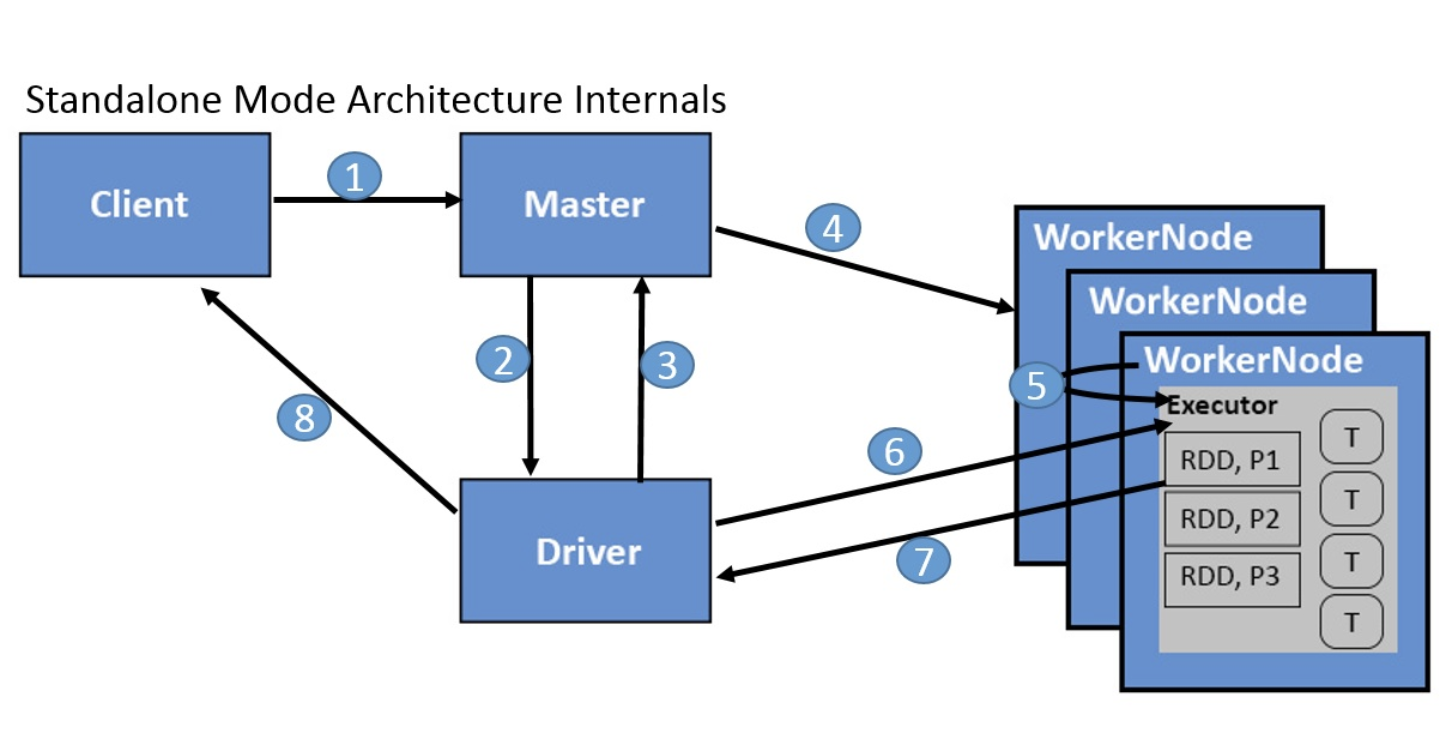

In [4]:
from IPython.display import Image
Image("/Users/ThyKhueLy/Downloads/spark-standalone-architect.png")

1. Client connects to Master
2. Master starts Driver on one of the nodes
3. Driver connects to Master and request for Executors to run the tasks
4. Master connects to Worker Node and request to create Executors
5. Each Worker Node creates one Executor for each Application
6. Driver connects to Executors & schedules tasks on it
7. Worker Nodes update the status of task to Driver
8. Driver sends application output to Client

###  Problem in standalone mode: 

If driver is asking for 20 executor on 100 nodes of cluster to resource manager, It will get the same but latter on when you are reading file from HDFS then there might be you will not get data locality because it not considering data partition while allocating nodes for executors and because of that you can see data shuffling is happening even if you are not running any wide transformations.

### Available commands (EC2)

- AWS EC2: Amazon cloud service - let you rent virtual servers 
- spark-ec2 script: 

| Command | Description |
|---------|:--------------|
| launch | Launches EC2 instances, Installs the required software packages and starts the master and slaves
| login | Logs in to the instance running the Spark master
| stop | Stops all the cluster instances 
| start| Starts all the cluster instances and re-configures the cluster 
| get-master | Return the address of the instance where the master in running 
| destroy | An unrecoverable action that terminate EC2 instances and destroys the cluster